In [29]:
import pandas as pd
sample_size=30000
df = pd.read_csv("data.csv")
df = df.dropna()
df = df.sample(sample_size)
df.date = pd.to_datetime(df.date)
df["date_day"] = list(map(lambda x: str(x).split()[0], df.date))
df = df.sort_values(by="date", ascending=True)
df.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,coordinates,date,text,user,strength,emotion,date_day,date_hour
23,"(37.270590000000006, 138.86116)",2018-08-27 10:31:06,え？(´⊙ω⊙`)ちびまる子ちゃんのさくらももこさんが？,tare_ilya,0.0699287,4,2018-08-27,2018-08-27 10
28,"(35.85718, 139.65079)",2018-08-27 10:31:08,あら～さくらももこ亡くなったのか,hiro5616,0.0642522,5,2018-08-27,2018-08-27 10
58,"(35.6895, 139.69163999999998)",2018-08-27 10:31:13,さくらももこさん亡くなったの？！,yuuhi___h,0.0608087,5,2018-08-27,2018-08-27 10
74,"(35.6895, 139.69163999999998)",2018-08-27 10:31:15,さくらももこさん😭😭\nお悔やみ申し上げます😭😭,pororontamy,0.048624,1,2018-08-27,2018-08-27 10
76,"(34.69119, 135.18311)",2018-08-27 10:31:15,RT @okasanman: ｢ちびまる子ちゃん｣の作者で漫画家の さくらももこさん(53)...,hiumajin2,0.139176,4,2018-08-27,2018-08-27 10


In [30]:
import numpy as np
import pandas as pd
import math
from math import sqrt
from random import random
from ast import literal_eval as make_tuple

colors = ["orange", "blue", "green", "red", "gray", "purple"]
in_colors = []
in_coords = []
in_dates = []
in_infos = []
for i, d in df.iterrows():
    in_colors.append(colors[int(d['emotion'])])
    in_coords.append(make_tuple(d['coordinates']))
    in_dates.append(d['date_day'])
    in_infos.append(d['text'])

In [31]:
list(map(len, [in_colors,in_coords,in_dates, in_infos]))

[30000, 30000, 30000, 30000]

In [34]:
%load_ext autoreload
%autoreload 2
import mapgen
center = (38, 137)
mapgen.plot_3("test_map_ver6.html", center, in_coords, in_colors, in_dates, in_infos)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


True

In [145]:
import numpy as np
import pandas as pd
import math
from math import sqrt
from random import random
from ast import literal_eval as make_tuple

d = []
rs = []
dflag = True
for i in range(6):
    r = []
    for name, group in df.groupby(["date_day"]):
        if dflag:
            d.append(sum([1 for x in group['emotion']]))
        r.append(sum([1 for x in group['emotion'] if int(x) == i]))
    rs.append(r)
    dflag = False

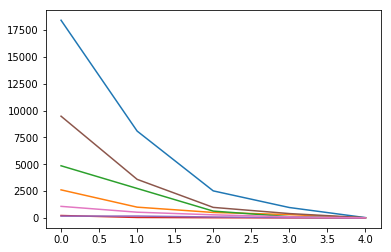

In [146]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(d)
for i in range(len(rs)):
    plt.plot(rs[i])

In [161]:
from burst_analysis.burst import burst

In [165]:
out = burst(d, s=2, gamma=0.1, binfile="./burst_analysis/burst.bin")

CalledProcessError: Command '['./burst_analysis/burst.bin', '2', '0.1', '/tmp/1081028838849299255_burst.tmp']' died with <Signals.SIGABRT: 6>.